# Connecing to Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, accuracy_score,classification_report,confusion_matrix

# Importing Data


In [4]:
data = pd.read_csv('/content/drive/MyDrive/MachineLearningProjects/SVM/bank-additional-full.csv',sep=';')
# as recommended by the dataset description, we will drop the last contact duration values
data = data.drop('duration',axis=1) 
data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Collecting Info About Data

In [5]:
data.shape

(41188, 20)

In [6]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [7]:
len(data.columns)

20

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


## Knowing the catagorical data

In [10]:
print('Jobs:\n', data['job'].unique())

Jobs:
 ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']


In [11]:
print('Marital:\n', data['marital'].unique())

Marital:
 ['married' 'single' 'divorced' 'unknown']


In [12]:
print('Education:\n', data['education'].unique())

Education:
 ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']


In [13]:
print('Default:\n', data['default'].unique())
print('Housing:\n', data['housing'].unique())
print('Loan:\n', data['loan'].unique())

Default:
 ['no' 'unknown' 'yes']
Housing:
 ['no' 'yes' 'unknown']
Loan:
 ['no' 'yes' 'unknown']


In [14]:
len(data[data['education']=='unknown'])

1731

In [15]:
len(data[data['housing']=='unknown'])

990

In [16]:
len(data[data['loan']=='unknown'])

990

In [17]:
len(data[data['default']=='unknown'])

8597

In [18]:
print(len(data[data['marital']=='unknown']))
print(len(data[data['job']=='unknown']))

80
330


## Visualization

### Visualization For Object Data

In [19]:
datagrouped = data.groupby('y')

In [20]:
def plot_barh(array,incrementer, bias, text_color ='blue', palette_style = 'darkgrid',palette_color = 'RdBu'):

    sns.set_style(palette_style)
    sns.set_palette(palette_color)

    plt.barh(array.index, width = array.values, height = .5)
    plt.yticks(np.arange(len(array)))
    plt.xticks( range(0, round(max(array)) +bias, incrementer ))

    for index, value in enumerate(array.values):
        plt.text(value +.5, index, s= '{:.1f}%'.format(value), color = text_color)

    #plt.show()
    return plt

In [21]:
def feature_perc(feature,groupby= 'yes'):

    count = datagrouped.get_group(groupby)[feature].value_counts()
    total_count = data[feature].value_counts()[count.index]

    perc = (count/total_count)*100
    return perc 

In [22]:
obj_column = data.dtypes[data.dtypes == 'object'].index
obj_column

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

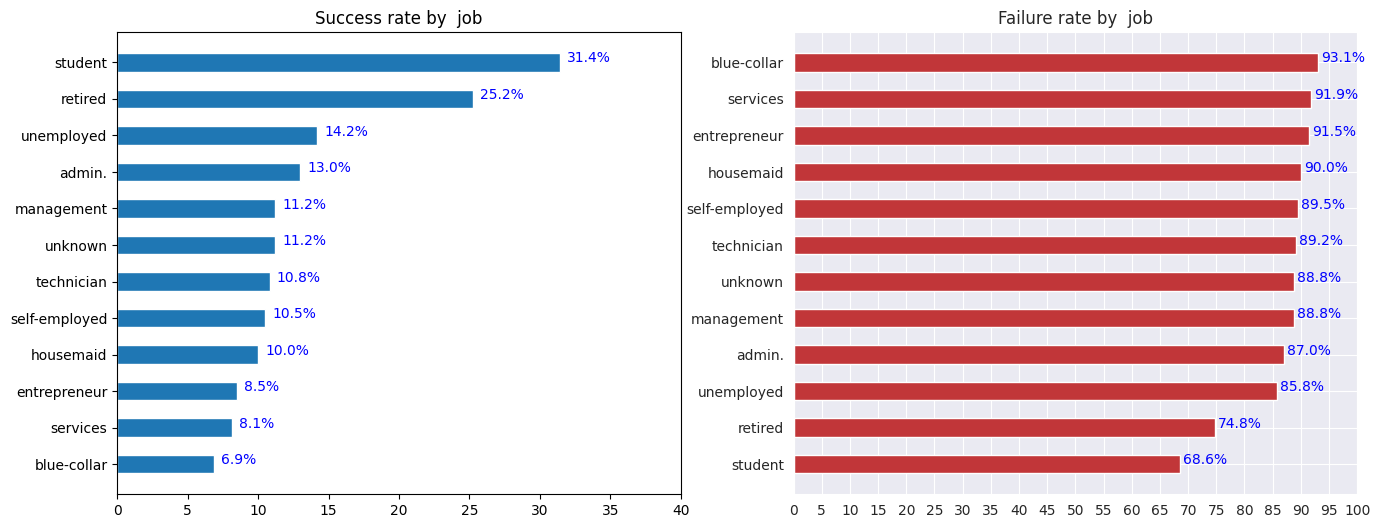

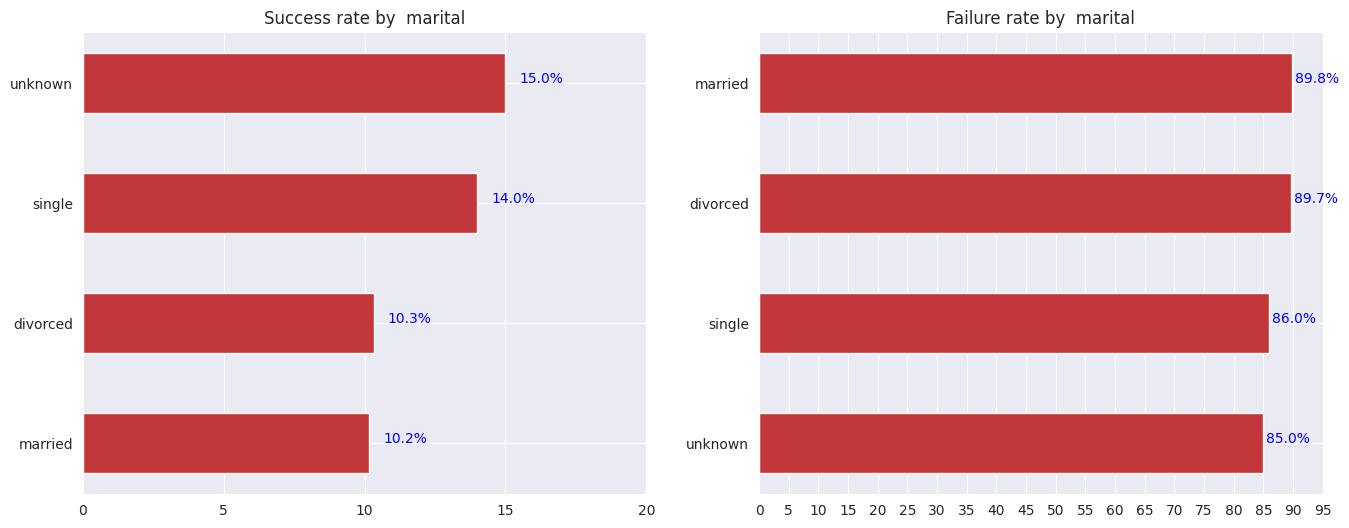

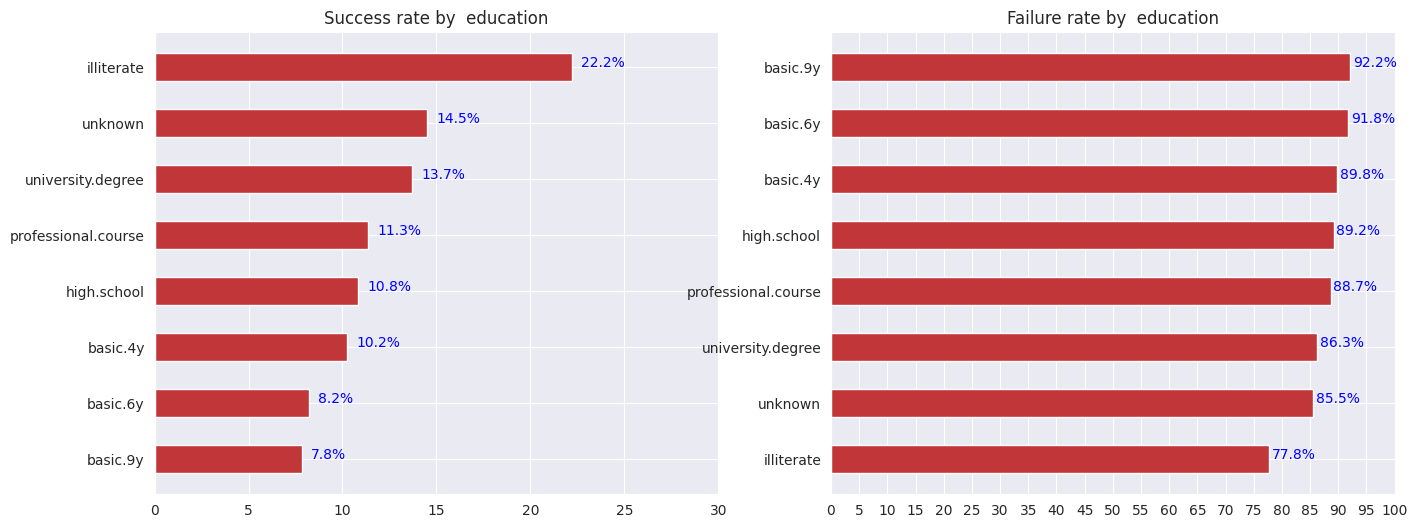

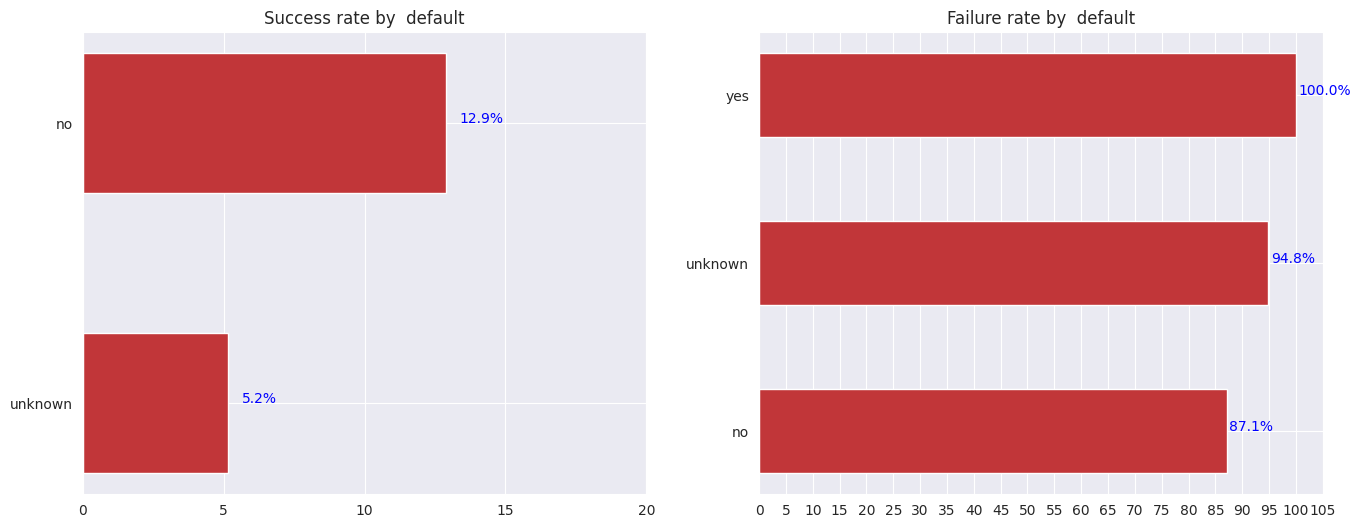

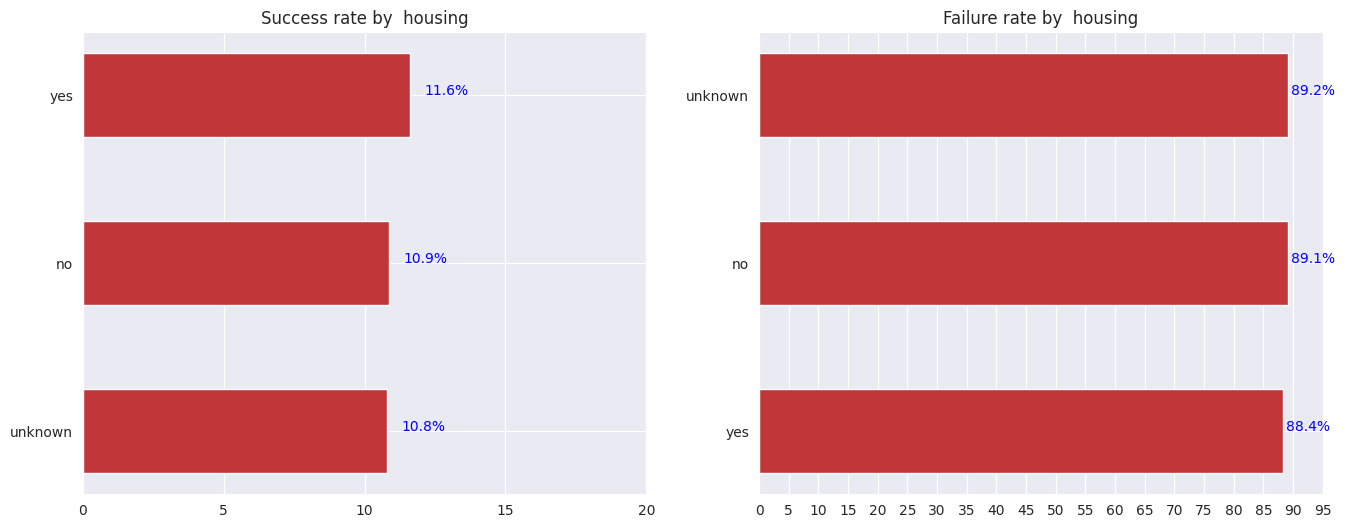

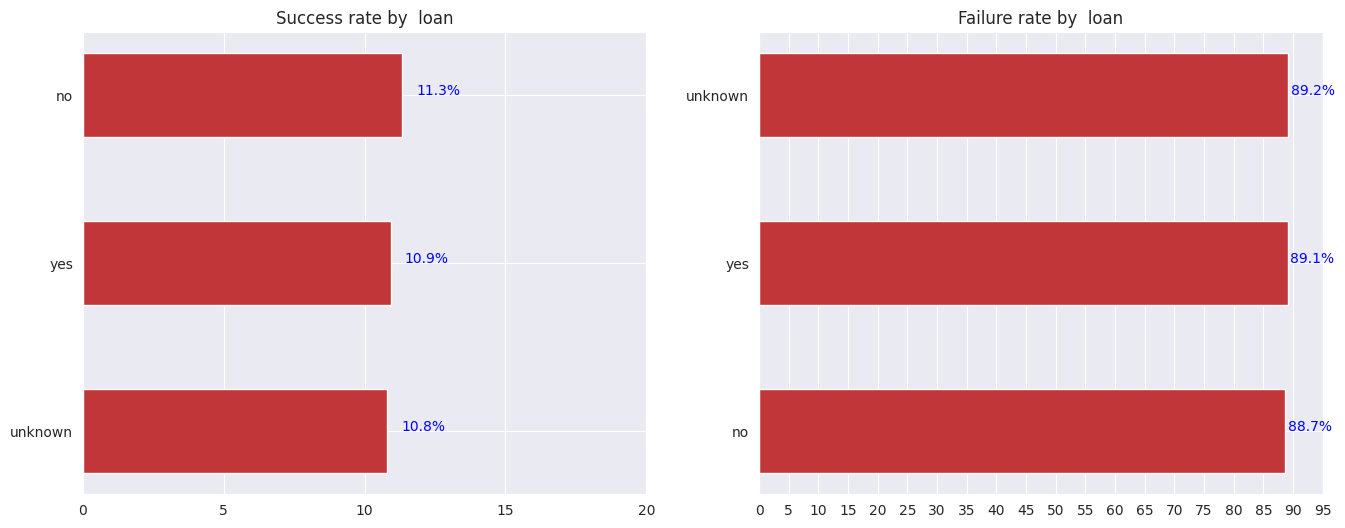

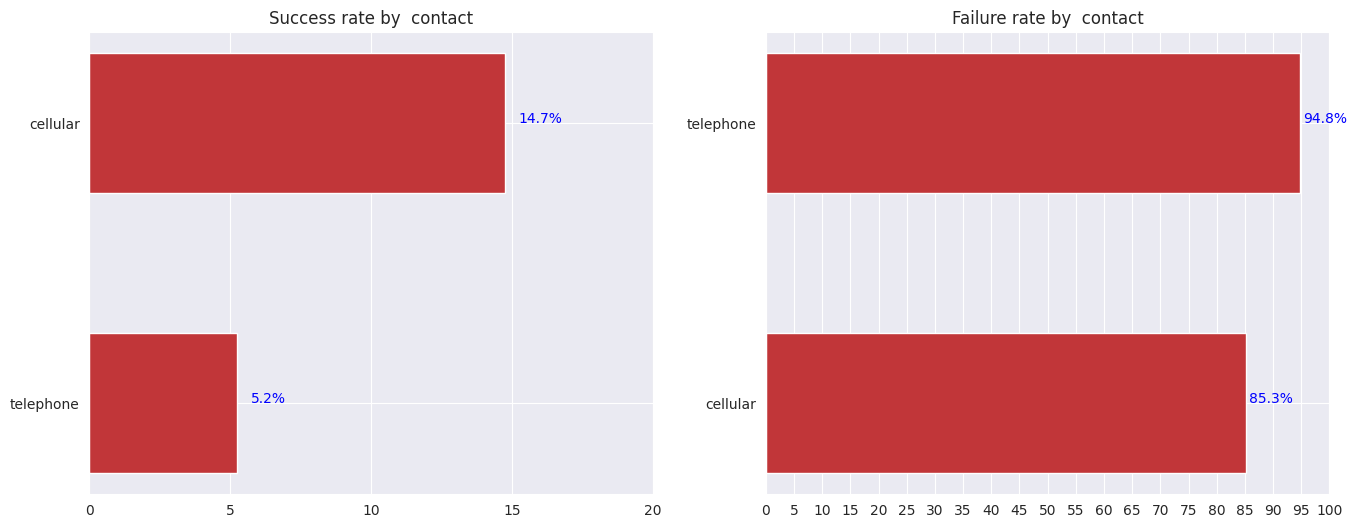

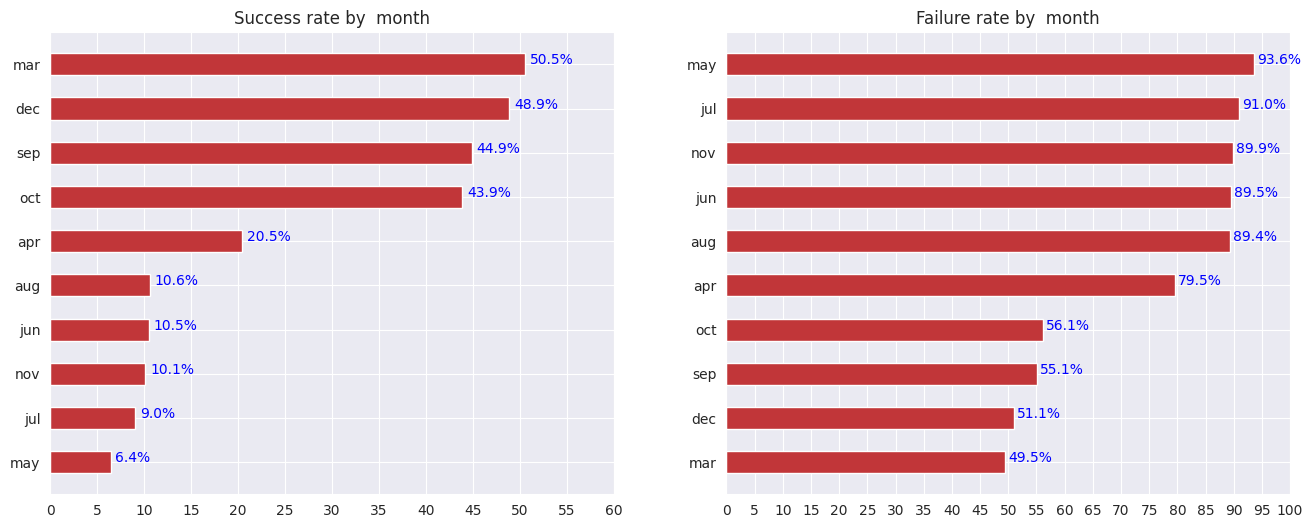

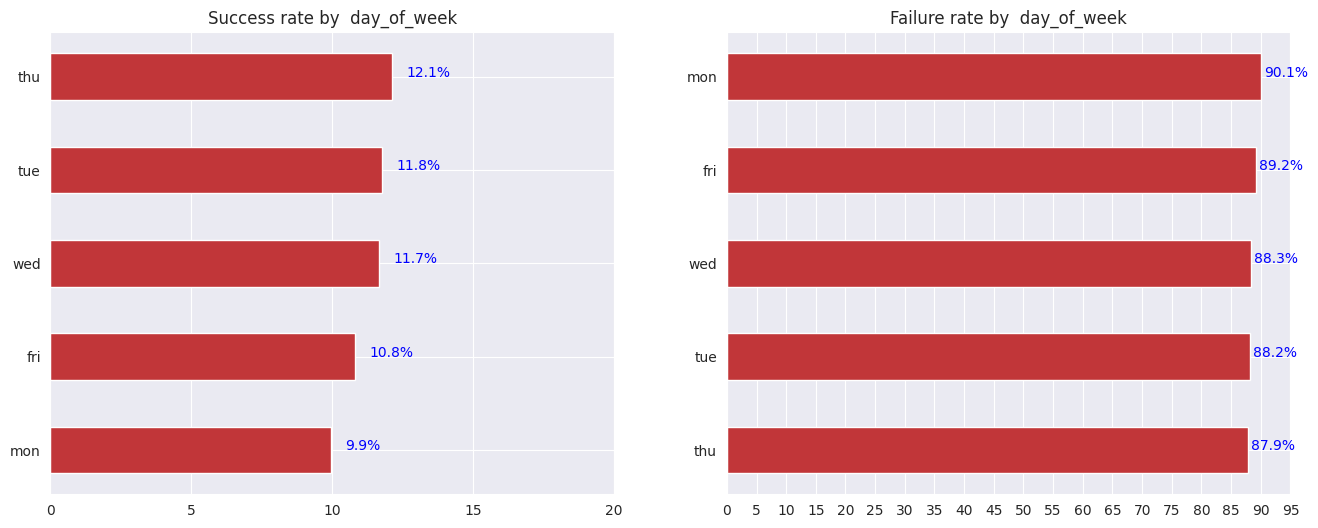

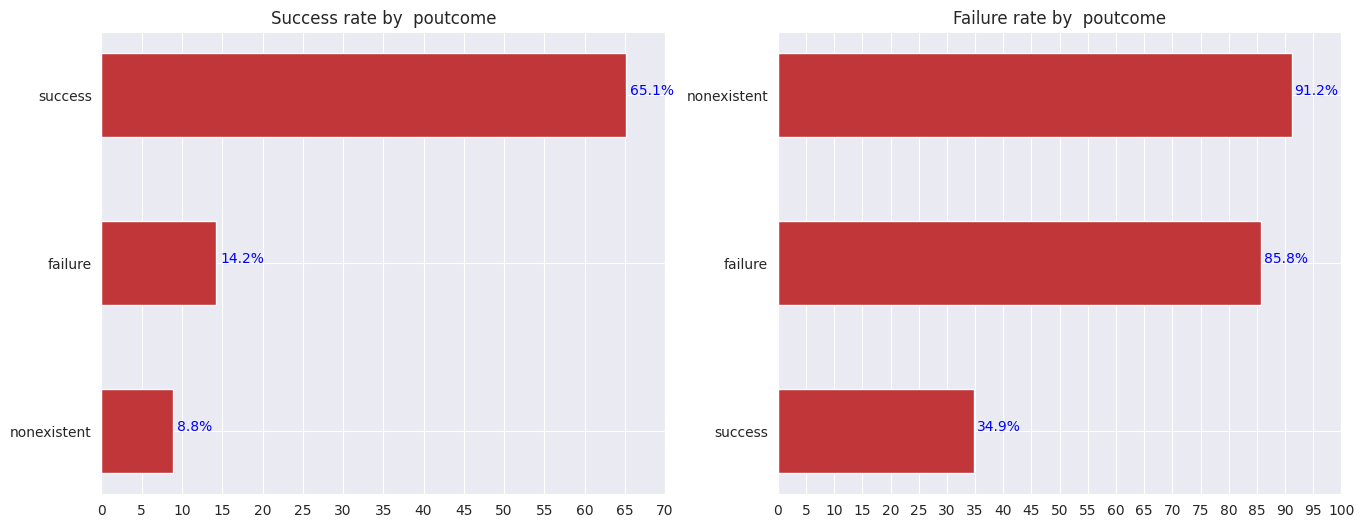

In [23]:
for column in obj_column[:-1]:

    yes_perc = feature_perc(column, groupby='yes')
    no_perc = feature_perc(column, groupby='no')

    plt.figure(figsize=(16,6))

    plt.subplot(1,2,1)
    plt.title(f'Success rate by  {column}')
    plot_barh(yes_perc.sort_values(),5,10)

    plt.subplot(1,2,2)
    plt.title(f'Failure rate by  {column}')
    plot_barh(no_perc.sort_values(),5,10)
    plt.show()
    print()


### Visualization For Numeric Data

In [24]:
int_column = data.dtypes[data.dtypes == 'int64'].index | data.dtypes[data.dtypes == 'float64'].index

<ipython-input-24-a5c9eb87129f>:1: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead.
  int_column = data.dtypes[data.dtypes == 'int64'].index | data.dtypes[data.dtypes == 'float64'].index


<ipython-input-25-a920cde7cc99>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
<ipython-input-25-a920cde7cc99>:17: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  counts, bins = np.histogram(data[column], bins=20, normed=True)


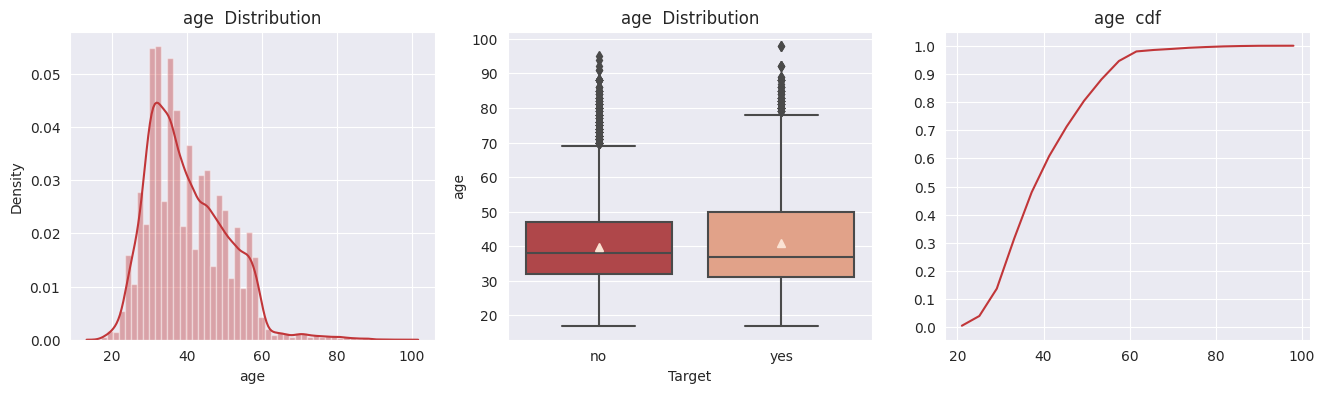

<ipython-input-25-a920cde7cc99>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
<ipython-input-25-a920cde7cc99>:17: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  counts, bins = np.histogram(data[column], bins=20, normed=True)


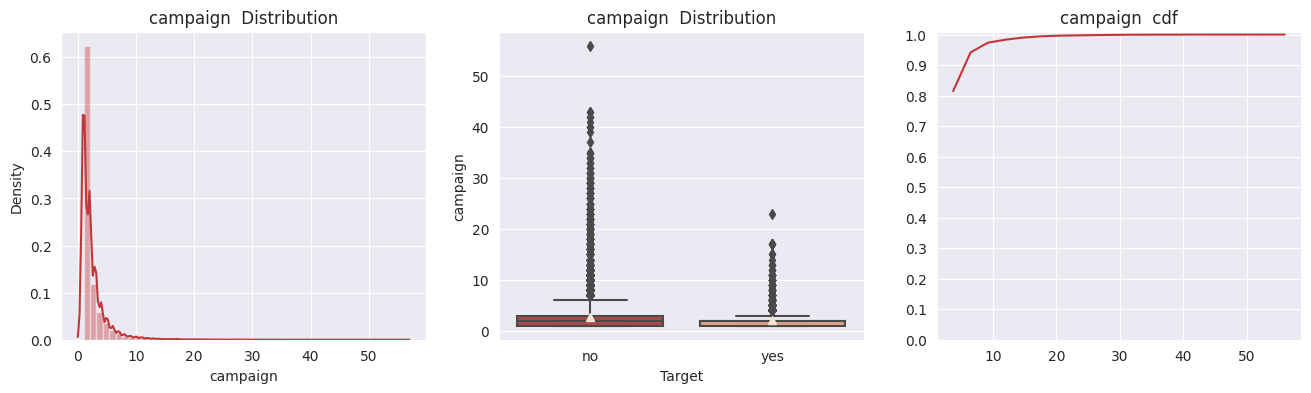

<ipython-input-25-a920cde7cc99>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
<ipython-input-25-a920cde7cc99>:17: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  counts, bins = np.histogram(data[column], bins=20, normed=True)


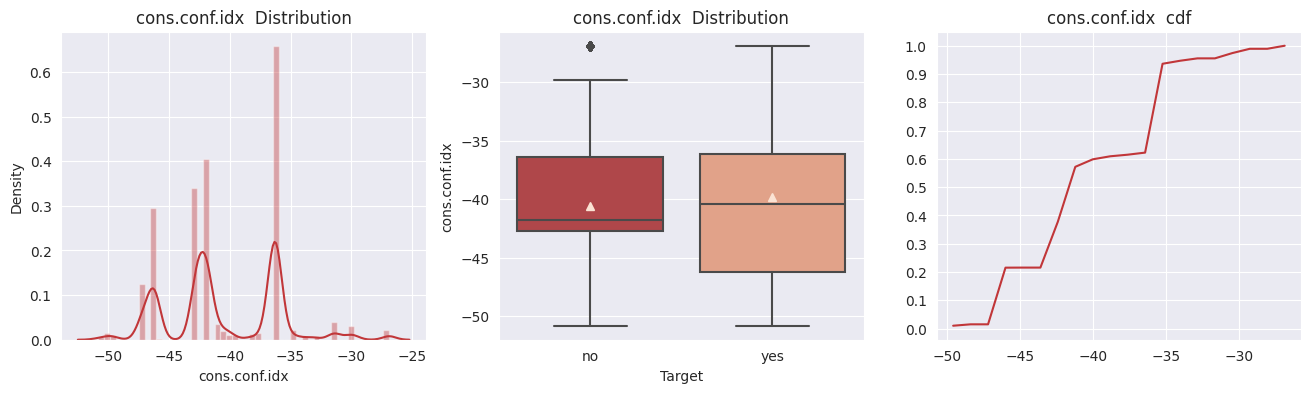

<ipython-input-25-a920cde7cc99>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
<ipython-input-25-a920cde7cc99>:17: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  counts, bins = np.histogram(data[column], bins=20, normed=True)


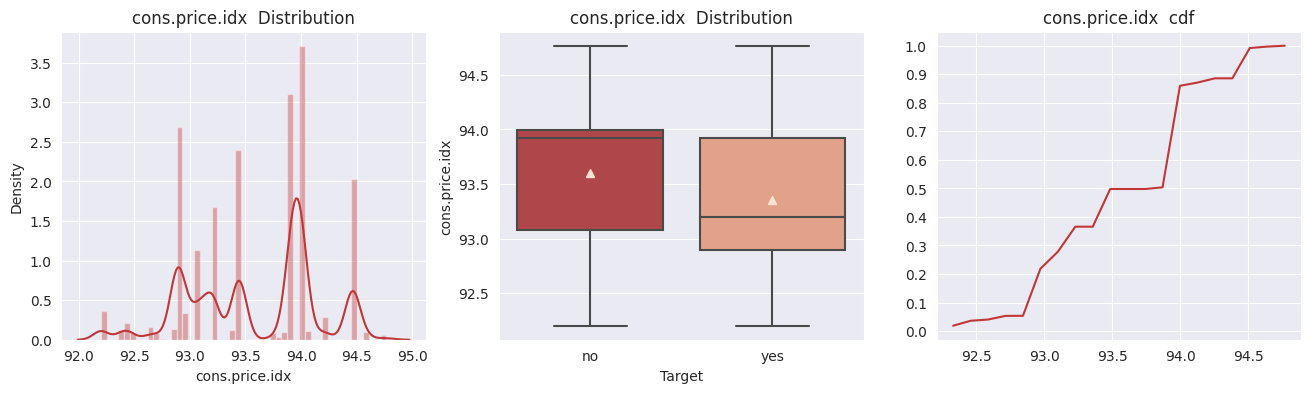

<ipython-input-25-a920cde7cc99>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
<ipython-input-25-a920cde7cc99>:17: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  counts, bins = np.histogram(data[column], bins=20, normed=True)


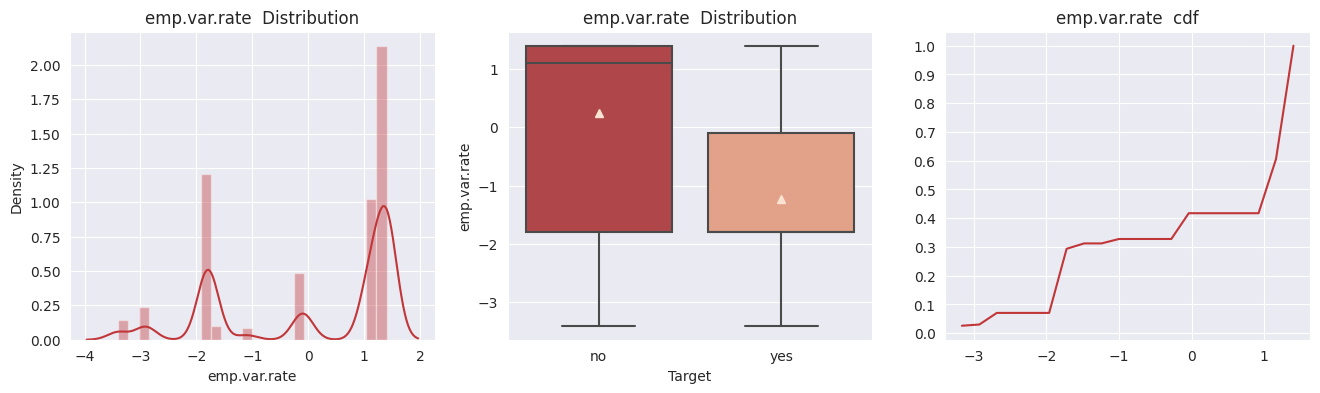

<ipython-input-25-a920cde7cc99>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
<ipython-input-25-a920cde7cc99>:17: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  counts, bins = np.histogram(data[column], bins=20, normed=True)


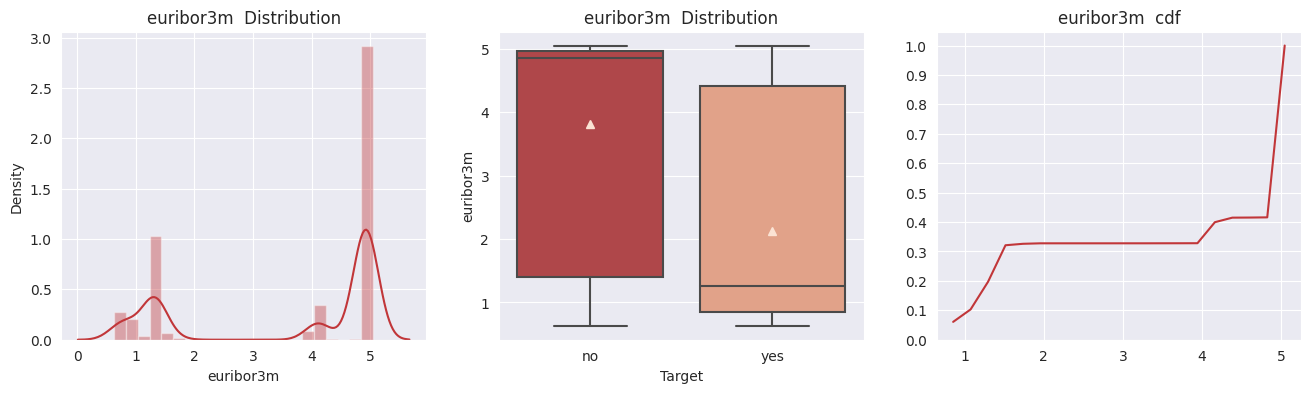

<ipython-input-25-a920cde7cc99>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
<ipython-input-25-a920cde7cc99>:17: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  counts, bins = np.histogram(data[column], bins=20, normed=True)


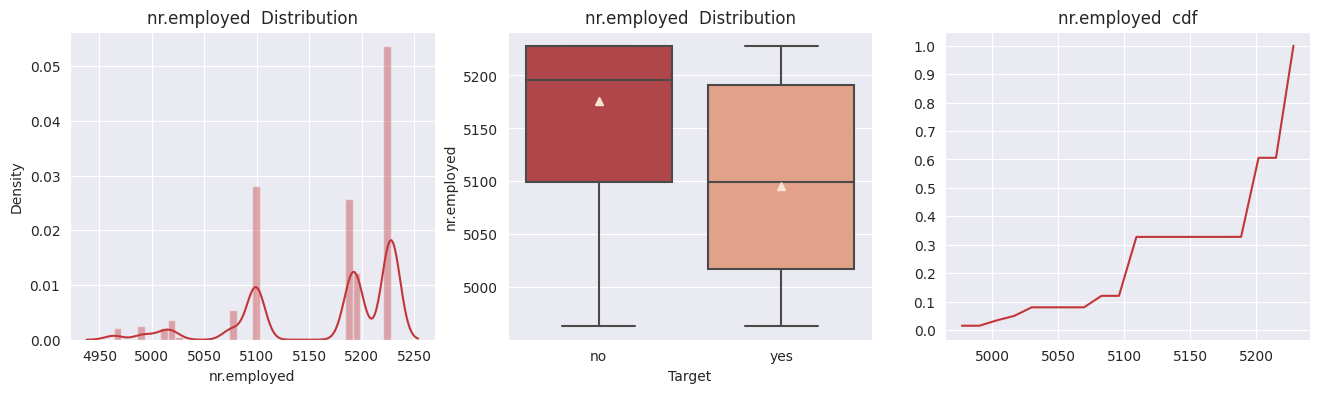

<ipython-input-25-a920cde7cc99>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
<ipython-input-25-a920cde7cc99>:17: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  counts, bins = np.histogram(data[column], bins=20, normed=True)


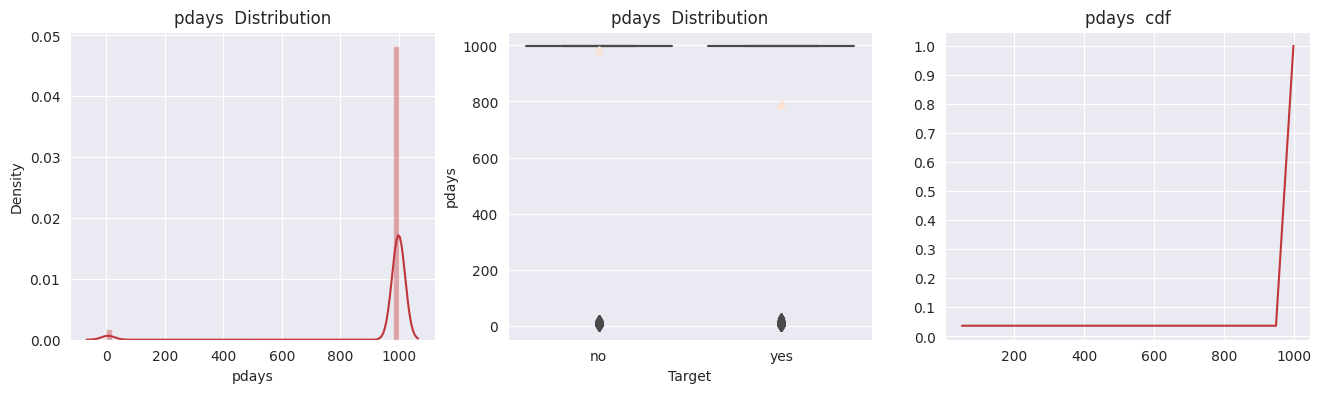

<ipython-input-25-a920cde7cc99>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
<ipython-input-25-a920cde7cc99>:17: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  counts, bins = np.histogram(data[column], bins=20, normed=True)


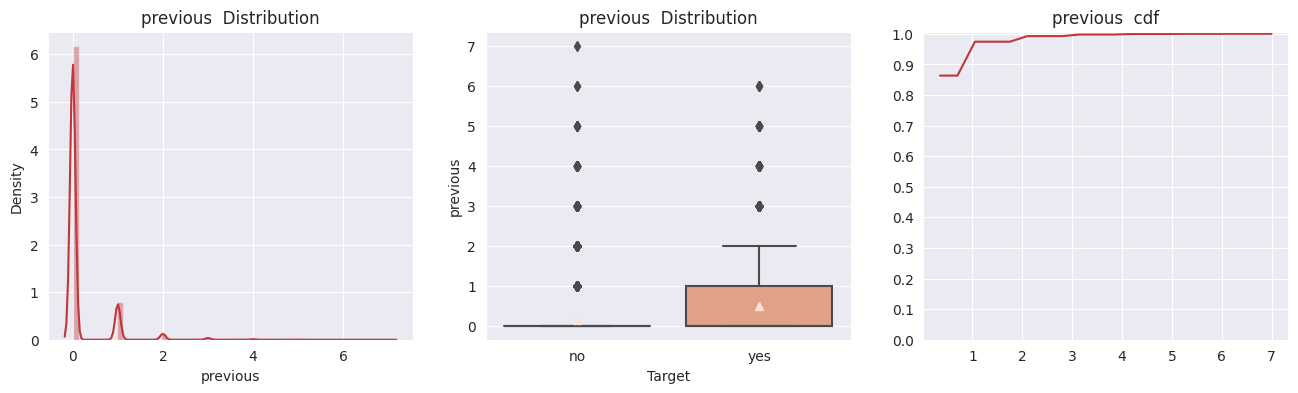

In [25]:
for column in int_column:
    plt.figure(figsize=(16,4))

    plt.subplot(1,3,1)
    sns.distplot(data[column])
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.title(f'{column}  Distribution')

    plt.subplot(1,3,2)
    sns.boxplot(x='y', y=column, data =data, showmeans=True )
    plt.xlabel('Target')
    plt.ylabel(column)
    plt.title(f'{column}  Distribution')

    plt.subplot(1,3,3)
    counts, bins = np.histogram(data[column], bins=20, normed=True)
    cdf = np.cumsum (counts)
    plt.plot (bins[1:], cdf/cdf[-1])
    #plt.xticks(range(15,100,5))
    plt.yticks(np.arange(0,1.1,.1))
    plt.title(f'{column}  cdf')
    plt.show()
    print()

### Correlation Matrix

<ipython-input-26-2ce88f950647>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap='RdYlGn')


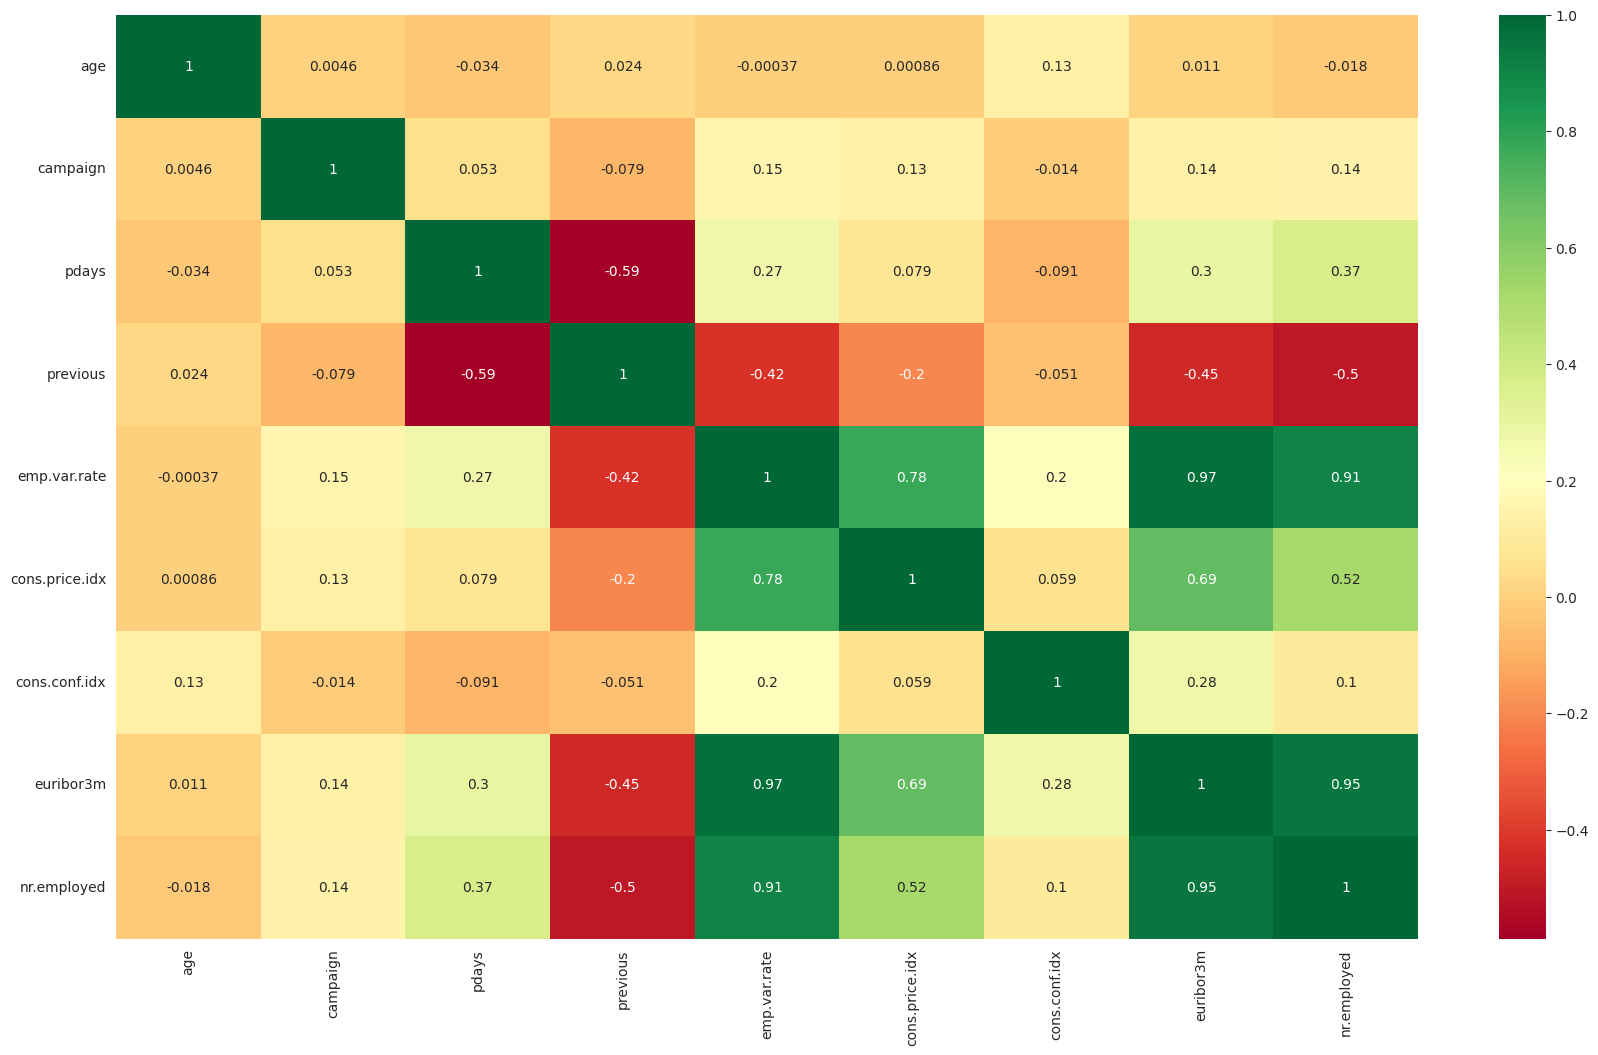

In [26]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(21,12)
plt.show()

# Cleaning Data

In [27]:
df = data.copy()

## Handling Ordinal Data

In [28]:
df['poutcome'] = df['poutcome'].map({'failure': -1,'nonexistent': 0,'success': 1})
df['default'] = df['default'].map({'yes': -1,'unknown': 0,'no': 1})
df['housing'] = df['housing'].map({'yes': -1,'unknown': 0,'no': 1})
df['loan'] = df['loan'].map({'yes': -1,'unknown': 0,'no': 1})

## Handling Nominal Data

In [29]:
nominal = ['job','marital','education','contact','month','day_of_week']
dataProcessed = pd.get_dummies(df,columns=nominal)

In [30]:
dataProcessed['y']=dataProcessed['y'].map({'yes': 1,'no': 0})
dataProcessed.head()

,age,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,56,1,1,1,1,999,0,0,1.1,93.994,...,0,1,0,0,0,0,1,0,0,0
1,57,0,1,1,1,999,0,0,1.1,93.994,...,0,1,0,0,0,0,1,0,0,0
2,37,1,-1,1,1,999,0,0,1.1,93.994,...,0,1,0,0,0,0,1,0,0,0
3,40,1,1,1,1,999,0,0,1.1,93.994,...,0,1,0,0,0,0,1,0,0,0
4,56,1,1,-1,1,999,0,0,1.1,93.994,...,0,1,0,0,0,0,1,0,0,0


## Handling Outliers

In [31]:
#age
Q1 = df['age'].quantile(.20)
Q3 = df['age'].quantile(.80)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df = df[df['age'] >= lower] 
df = df[df['age'] <=upper] 
#previous
Q1 = df['previous'].quantile(.20)
Q3 = df['previous'].quantile(.80)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df = df[df['previous'] >= lower] 
df = df[df['previous'] <=upper] 
#campaign
Q1 = df['campaign'].quantile(.20)
Q3 = df['campaign'].quantile(.80)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df = df[df['campaign'] >= lower] 
df = df[df['campaign'] <=upper] 
#cons.conf.idx
Q1 = df['cons.conf.idx'].quantile(.20)
Q3 = df['cons.conf.idx'].quantile(.80)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df = df[df['cons.conf.idx'] >= lower] 
df = df[df['cons.conf.idx'] <=upper] 

### Visualization For Outlier Free Data

In [32]:
columns = ['cons.conf.idx','campaign','previous','age']

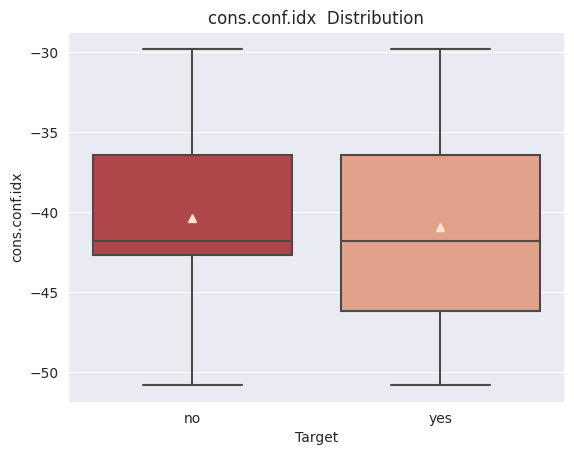

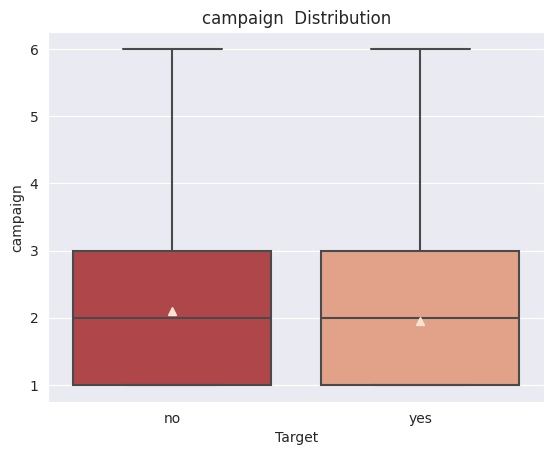

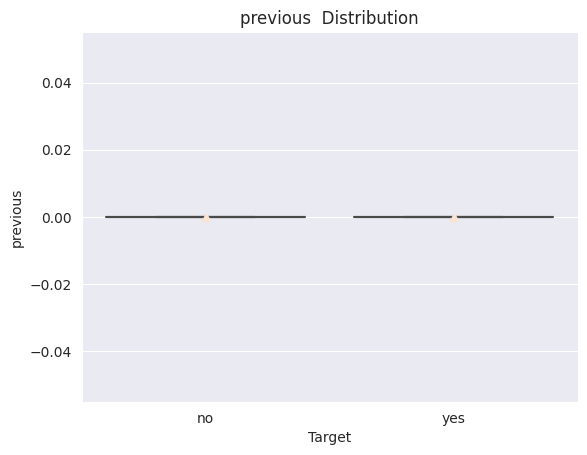

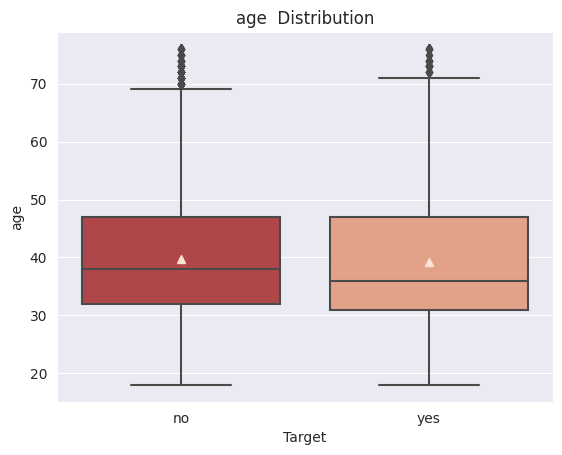

In [33]:
for column in columns:
  sns.boxplot(x='y', y=column, data =df, showmeans=True )
  plt.xlabel('Target')
  plt.ylabel(column)
  plt.title(f'{column}  Distribution')
  plt.show()

# Spliting Data

In [34]:
X = dataProcessed.drop('y', axis=1).values
y = dataProcessed['y'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


print('X train size: ', X_train.shape)
print('y train size: ', y_train.shape)
print('X test size: ', X_test.shape)
print('y test size: ', y_test.shape)

X train size:  (28831, 54)
y train size:  (28831,)
X test size:  (12357, 54)
y test size:  (12357,)


## Scaling Data

In [35]:
idx_numeric=[0,7,8,9,11,10,11,12,13]
print(dataProcessed.columns[idx_numeric])

# standardize numeric variables only
scaler = StandardScaler()
X_train[:,idx_numeric]=scaler.fit_transform(X_train[:,idx_numeric])
X_test[:,idx_numeric]=scaler.transform(X_test[:,idx_numeric])

Index(['age', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'euribor3m',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


# Building SVM Model

In [36]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [0.1],
                     'C': [1]},
                    {'kernel': ['linear'], 'C': [1]}]

clf = GridSearchCV(SVC(), tuned_parameters, cv=5, scoring='precision')
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1], 'gamma': [0.1], 'kernel': ['rbf']},
                         {'C': [1], 'kernel': ['linear']}],
             scoring='precision')

In [37]:
print(clf.cv_results_)

{'mean_fit_time': array([51.84294972, 14.88813982]), 'std_fit_time': array([6.481388  , 4.02843768]), 'mean_score_time': array([4.47139664, 0.87644897]), 'std_score_time': array([0.71963444, 0.12107362]), 'param_C': masked_array(data=[1, 1],
             mask=[False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[0.1, --],
             mask=[False,  True],
       fill_value='?',
            dtype=object), 'param_kernel': masked_array(data=['rbf', 'linear'],
             mask=[False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}, {'C': 1, 'kernel': 'linear'}], 'split0_test_score': array([0.67058824, 0.63636364]), 'split1_test_score': array([0.65271967, 0.64824121]), 'split2_test_score': array([0.67099567, 0.64573991]), 'split3_test_score': array([0.69642857, 0.68811881]), 'split4_test_score': array([0.68951613, 0.66824645]), 'mean_test_score': array([0.67604965, 0.657342  ]), 'std

In [38]:
print('The best model is: ', clf.best_params_)
print('This model produces a mean cross-validated score (precision) of', clf.best_score_)

The best model is:  {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
This model produces a mean cross-validated score (precision) of 0.6760496544045169


In [39]:
y_pred = clf.predict(X_test)

# Evaluating Model

## Classification Report

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95     10968
           1       0.65      0.24      0.35      1389

    accuracy                           0.90     12357
   macro avg       0.78      0.61      0.65     12357
weighted avg       0.88      0.90      0.88     12357



## Confusion Matrix

Text(0.5, 23.52222222222222, 'Predicted label')

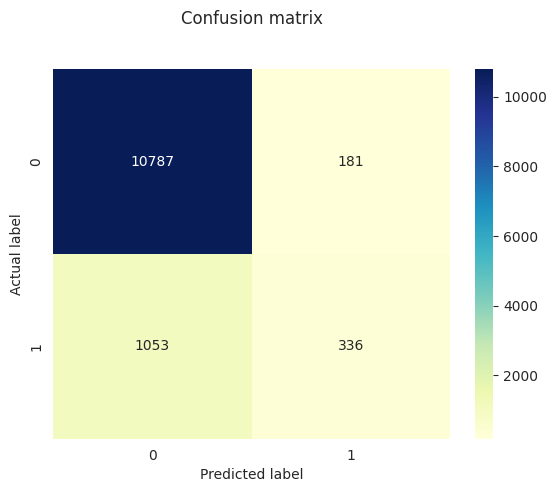

In [41]:
cnf_matrix = confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')